#  Analisis Tarifas

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
data= pd.read_csv('DATA_FINAL_final.csv',sep=';', header = 0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
len(data)

2625372

In [5]:
data.shape

(2625372, 78)

In [6]:
data.describe()

,CUENTA_1,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,...,OP_CLARO,CANTIDAD,PENETRACION,OCUPACION_DW,OCUPACION_UP,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO
count,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2625372.0,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,...,2.625372e+06,2.625372e+06,2.625012e+06,2.584189e+06,2.608706e+06,2.261588e+06,2.496668e+06,2.303181e+06,2.625372e+06,2.625372e+06
mean,5.031200e+07,-1.259559e-01,-1.142010e-02,-3.512264e-03,-1.247023e-02,0.0,-3.535880e-03,-1.003591e-02,-4.209308e-03,-2.601917e-03,...,1.157439e+00,2.126980e+00,3.905945e-01,5.010952e-01,4.450795e-01,1.287500e+00,1.313803e+00,1.008703e+00,2.621686e-02,1.769928e-01
std,2.906223e+07,3.326229e-01,1.091005e-01,5.943000e-02,1.119729e-01,0.0,5.972908e-02,1.003875e-01,6.507699e-02,5.147813e-02,...,1.398096e+00,1.209320e+00,2.731839e+00,1.560676e-01,1.495913e-01,1.902885e+00,1.700813e+00,7.379863e-01,2.727126e-01,6.762352e-01
min,3.070000e+02,-1.600000e+01,-4.000000e+00,-4.000000e+00,-4.000000e+00,0.0,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.324111e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500967e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,3.066955e-01,3.947326e-01,3.389833e-01,4.747357e-01,8.282353e-01,4.764285e-01,0.000000e+00,0.000000e+00
50%,4.691641e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,3.670170e-01,5.004056e-01,4.379572e-01,9.403137e-01,1.094208e+00,8.626654e-01,0.000000e+00,0.000000e+00
75%,7.762231e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,3.000000e+00,4.442760e-01,6.025516e-01,5.438192e-01,1.668687e+00,1.461318e+00,1.397083e+00,0.000000e+00,0.000000e+00
max,9.969995e+07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.200000e+01,1.200000e+01,3.125000e+03,1.045716e+00,1.063611e+00,2.499854e+02,1.380000e+02,1.388436e+01,1.000000e+01,1.200000e+01


# PLAN
    1. listar Nodos
    2. Calcular medida tarifa
    3. Ordenar en pivot por mes
    4. Calcular dif Ene_Mayo y dif Ene_Nov
    5. Agrupar
    6. Identificar causas (arbol, cluster u otros)
    
##  Tener en cuenta campos
* 'CD_BLANCOS_CAMBIOS_SERVICIO'
* analisis diferentes por INVOLUNTARIO



In [7]:
data.columns

Index(['CUENTA_1', 'COD_SERVICIO', 'COD_NODO', 'ESTRATO', 'CARTERA',
       'CONGELACION', 'VIAJES', 'CAPACIDAD_DE_PAGO', 'CAUSAS_EXTERNAS',
       'COMPETENCIA', 'MAL_SERVICIO', 'NO_UTILIZAR', 'NO_GUSTO', 'SIN_MOTIVO',
       'SIN_CONTACTO', 'TRASLADOS', 'OTROS', 'CD_BLANCOS_CAMBIOS_OTROS',
       'CAMBIO_DE_SERVICIO', 'CAMBIO_TARIFA', 'EMPAQUETAMIENTO',
       'CESION_DE_CONTRATO', 'UNIFICACION_EMPAQUETAMIENTO',
       'CD_BLANCOS_CAMBIOS_SERVICIO', 'etalle_Internet', 'FECHA_1',
       'MESES_ACTIVO', 'EDAD', 'GENERACION', 'CHURN_TEMPRANO', 'INVOLUNTARIO',
       'VOLUNTARIO', 'TIPO_RAZON', 'PART_CANT_CALL', 'CANT_USER', 'PROM_VEL',
       'VEL_ME_8', 'VEL_10_25', 'VEL_30', 'VEL_40_50', 'VEL_MA_60',
       'CONVERGENTE', 'PROM_VEL_HOGAR', 'MEDIANA_VEL', 'PROM_RENTA',
       'PRECIO_MEGA_CLARO_1', 'CANTIDAD_churn', 'ANTIGUEDAD_MESES_PROM',
       'ANTIGUEDAD_MESES_MED', 'AVG_TARIFA_TIGO', 'AVG_TIGO_MEGAS',
       'PRECIO_MEGA_TIGO_1', 'AVG_TARIFA_ETB', 'AVG_ETB_MEGAS',
       'PRECIO_

In [8]:
data.head()

,CUENTA_1,COD_SERVICIO,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,...,ALFA,BETA,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO
0,14233509,DV3,RUB,2,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.711700,1.376307,0.517108,0,0,REGION COSTA,COSTA SUR,BOLIVAR,CARTAGENA,BOLIVAR DISTRITO 2
1,44291367,NB3,5AE013,5,0.0,0.0,0.0,0.0,0.0,0.0,...,3.988656,2.800000,1.424520,0,2,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,CEDRITOS
2,30887489,BC4,A2H,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.270378,0.838951,0.322281,0,0,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 1
3,40600559,R30,FR3,3,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.441687,0.621212,0.711009,0,0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,FACATATIVA,FACATATIVA
4,89644678,VR2,5C2014,4,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.516365,0.859684,1.763864,0,0,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS


In [9]:
data[['INVOLUNTARIO','VOLUNTARIO']].value_counts().to_frame().sort_index()

,,0
INVOLUNTARIO,VOLUNTARIO,
-1.0,0.0,330399
0.0,-1.0,2294973


In [10]:
data[['FECHA_1']].value_counts()

FECHA_1
6          579940
5          384641
7          330204
3          321621
4          318247
10         269766
1          211086
2          209867
dtype: int64

In [11]:
# Seleccion variables para medida tarifa

In [12]:
seleccion_variables=['COD_NODO','FECHA_1','INVOLUNTARIO','CD_BLANCOS_CAMBIOS_SERVICIO','AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR','PROM_RENTA']
# no hay precio mega Movistart

In [13]:
data[seleccion_variables].sort_values('COD_NODO')

,COD_NODO,FECHA_1,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
1472774,01J,1,0.0,-1.0,NaN,NaN,NaN,104848
469692,01J,3,0.0,-1.0,NaN,NaN,NaN,106836
470556,01J,3,0.0,-1.0,NaN,NaN,NaN,106836
1009725,01J,2,0.0,-1.0,NaN,NaN,NaN,104127
1491308,01J,6,0.0,-1.0,NaN,NaN,NaN,108074
...,...,...,...,...,...,...,...,...
862871,ZVZ,6,0.0,-1.0,NaN,NaN,NaN,111024
439622,ZVZ,3,0.0,-1.0,NaN,NaN,NaN,109221
452726,ZVZ,3,0.0,-1.0,NaN,NaN,NaN,109221
971770,ZVZ,7,0.0,-1.0,NaN,NaN,NaN,110579


In [14]:
data[seleccion_variables].isnull().sum()

COD_NODO                             0
FECHA_1                              0
INVOLUNTARIO                         0
CD_BLANCOS_CAMBIOS_SERVICIO          0
AVG_TARIFA_TIGO                 991025
AVG_TARIFA_ETB                 2100936
AVG_TARIFA_MOVISTAR            1121152
PROM_RENTA                           0
dtype: int64

In [15]:
data[seleccion_variables].isnull().sum()/len(data)

COD_NODO                       0.000000
FECHA_1                        0.000000
INVOLUNTARIO                   0.000000
CD_BLANCOS_CAMBIOS_SERVICIO    0.000000
AVG_TARIFA_TIGO                0.377480
AVG_TARIFA_ETB                 0.800243
AVG_TARIFA_MOVISTAR            0.427045
PROM_RENTA                     0.000000
dtype: float64

In [16]:
data[seleccion_variables].describe()

,FECHA_1,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA
count,2.625372e+06,2.625372e+06,2.625372e+06,1.634347e+06,524436.000000,1.504220e+06,2.625372e+06
mean,5.058561e+00,-1.258485e-01,-7.783190e-01,1.245964e+05,90068.193450,1.042553e+05,1.032052e+05
std,2.430334e+00,3.316785e-01,4.418004e-01,1.141027e+04,18204.870056,9.489027e+03,1.732289e+04
min,1.000000e+00,-1.000000e+00,-1.500000e+01,7.199000e+04,79900.000000,7.199000e+04,1.134200e+04
25%,3.000000e+00,0.000000e+00,-1.000000e+00,1.187500e+05,79900.000000,9.790000e+04,9.119200e+04
50%,5.000000e+00,0.000000e+00,-1.000000e+00,1.272727e+05,79900.000000,1.062333e+05,1.028990e+05
75%,6.000000e+00,0.000000e+00,-1.000000e+00,1.300000e+05,93150.000000,1.129000e+05,1.124610e+05
max,1.000000e+01,0.000000e+00,0.000000e+00,1.635700e+05,149900.000000,1.129000e+05,2.406560e+05


In [17]:
#alfa=com/nuestro

In [18]:
data_medida=data[seleccion_variables].copy()

In [19]:
variables_tarifa=['AVG_TARIFA_TIGO','AVG_TARIFA_ETB','AVG_TARIFA_MOVISTAR']

In [20]:
data_medida['comp_tarifa']=data_medida[variables_tarifa].min(axis=1)

In [21]:
data_medida['operador_menor_tarifa']=np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_TIGO'],'AVG_TARIFA_TIGO',
                                              np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_ETB'],'AVG_TARIFA_ETB',
                                                      np.where(data_medida['comp_tarifa']==data_medida['AVG_TARIFA_MOVISTAR'],'AVG_TARIFA_MOVISTAR','NINGUNO'
                                             )))

In [22]:
data_medida['ALFA_tarifa']=np.where(data_medida['operador_menor_tarifa']=='NINGUNO',np.nan,data_medida['comp_tarifa']/data_medida['PROM_RENTA'])

In [23]:
data_medida

,COD_NODO,FECHA_1,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
0,RUB,7,-1.0,0.0,120000.0,NaN,102900.0,92437,102900.0,AVG_TARIFA_MOVISTAR,1.113191
1,5AE013,10,0.0,-1.0,NaN,NaN,NaN,147169,NaN,NINGUNO,NaN
2,A2H,5,0.0,-1.0,125000.0,NaN,107900.0,84577,107900.0,AVG_TARIFA_MOVISTAR,1.275761
3,FR3,3,-1.0,0.0,NaN,NaN,NaN,92467,NaN,NINGUNO,NaN
4,5C2014,4,0.0,0.0,NaN,NaN,NaN,132001,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2625367,TN62D,1,0.0,-1.0,130000.0,NaN,112900.0,116877,112900.0,AVG_TARIFA_MOVISTAR,0.965973
2625368,TN62D,1,0.0,-1.0,130000.0,NaN,112900.0,116877,112900.0,AVG_TARIFA_MOVISTAR,0.965973
2625369,TN62D,1,0.0,0.0,130000.0,NaN,112900.0,116877,112900.0,AVG_TARIFA_MOVISTAR,0.965973
2625370,TN62D,1,0.0,-1.0,130000.0,NaN,112900.0,116877,112900.0,AVG_TARIFA_MOVISTAR,0.965973


In [24]:
resumen_medida=pd.pivot_table(data_medida[['FECHA_1','COD_NODO','ALFA_tarifa']], columns='FECHA_1', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

FECHA_1,1,2,3,4,5,6,7,10
COD_NODO,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,1.035875
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.957562
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,0.474946
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.029064
...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.121575
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.844062
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.041562


In [25]:
data_medida[data_medida['COD_NODO']=='01S'].sort_values('FECHA_1')

,COD_NODO,FECHA_1,INVOLUNTARIO,CD_BLANCOS_CAMBIOS_SERVICIO,AVG_TARIFA_TIGO,AVG_TARIFA_ETB,AVG_TARIFA_MOVISTAR,PROM_RENTA,comp_tarifa,operador_menor_tarifa,ALFA_tarifa
578470,01S,1,0.0,-1.0,NaN,NaN,NaN,89601,NaN,NINGUNO,NaN
578614,01S,1,0.0,-1.0,NaN,NaN,NaN,89601,NaN,NINGUNO,NaN
578326,01S,1,-1.0,0.0,NaN,NaN,NaN,89601,NaN,NINGUNO,NaN
578182,01S,1,0.0,0.0,NaN,NaN,NaN,89601,NaN,NINGUNO,NaN
578038,01S,1,0.0,-1.0,NaN,NaN,NaN,89601,NaN,NINGUNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1265412,01S,10,0.0,-1.0,104000.0,120100.0,94390.0,91121,94390.0,AVG_TARIFA_MOVISTAR,1.035875
1265268,01S,10,0.0,-1.0,104000.0,120100.0,94390.0,91121,94390.0,AVG_TARIFA_MOVISTAR,1.035875
1265124,01S,10,-1.0,0.0,104000.0,120100.0,94390.0,91121,94390.0,AVG_TARIFA_MOVISTAR,1.035875
1264836,01S,10,0.0,-1.0,104000.0,120100.0,94390.0,91121,94390.0,AVG_TARIFA_MOVISTAR,1.035875


In [26]:
resumen_medida.isnull().sum()

FECHA_1
1     2847
2     2863
3     2679
4     2505
5     2641
6     2446
7     2261
10    2052
dtype: int64

In [27]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA_1
1     0.297803
2     0.299477
3     0.280230
4     0.262029
5     0.276255
6     0.255858
7     0.236506
10    0.214644
dtype: float64

<AxesSubplot:xlabel='FECHA_1'>

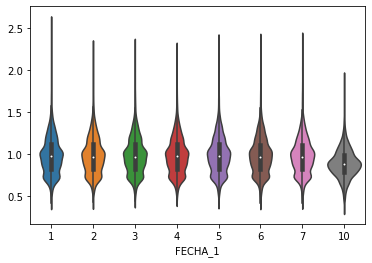

In [28]:
sns.violinplot(data=resumen_medida)

In [29]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [30]:
resumen_medida.describe()

FECHA_1,1,2,3,4,5,6,7,10,ene_oct,ene_may
count,6713.000000,6697.000000,6881.000000,7055.000000,6919.000000,7114.000000,7299.000000,7508.000000,5700.000000,5502.000000
mean,0.986712,0.986443,0.985915,0.985102,0.989375,0.985432,0.982186,0.896939,-0.096384,-0.006940
std,0.222267,0.219796,0.216817,0.216383,0.218989,0.217743,0.211960,0.169599,0.170890,0.177356
min,0.424251,0.427115,0.443353,0.459624,0.432857,0.421675,0.423495,0.346936,-0.964745,-1.020891
25%,0.824717,0.824834,0.828429,0.824752,0.829741,0.826673,0.831010,0.791119,-0.199950,-0.061010
50%,0.976154,0.974805,0.974316,0.976289,0.978073,0.973825,0.974477,0.887471,-0.111658,0.000751
75%,1.127677,1.122596,1.119929,1.120116,1.123285,1.117789,1.111834,0.997461,0.016034,0.047752
max,2.567901,2.282624,2.302515,2.256057,2.353665,2.362262,2.378556,1.918936,0.371453,0.670422


<AxesSubplot:xlabel='FECHA_1'>

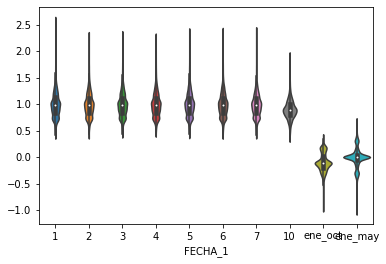

In [31]:
sns.violinplot(data=resumen_medida)

In [32]:
resumen_medida

FECHA_1,1,2,3,4,5,6,7,10,ene_oct,ene_may
COD_NODO,,,,,,,,,,
01S,NaN,NaN,0.875348,0.871263,1.209064,0.863952,0.860241,1.035875,NaN,NaN
02S,1.274914,0.907934,1.277684,1.258177,1.259581,1.270295,1.254361,0.957562,-0.317352,-0.015333
0AL,NaN,NaN,0.738222,NaN,0.728679,0.539047,0.760157,0.474946,NaN,NaN
0AO,0.810964,NaN,0.988197,1.077074,NaN,NaN,NaN,NaN,NaN,NaN
0AR,1.284109,1.216581,1.298053,1.183848,1.104240,1.320534,1.172261,1.029064,-0.255045,-0.179869
...,...,...,...,...,...,...,...,...,...,...
ZUL,1.063994,NaN,1.671811,1.072029,1.091996,1.088498,1.090459,1.121575,0.057581,0.028003
ZVD,0.986515,0.960976,0.974316,0.979039,0.931441,0.957367,0.953681,0.844062,-0.142453,-0.055074
ZVG,1.172341,1.176593,1.132425,1.066752,1.174378,1.166202,1.072115,1.041562,-0.130779,0.002037


In [33]:
resumen_medida.isnull().sum()

FECHA_1
1          2847
2          2863
3          2679
4          2505
5          2641
6          2446
7          2261
10         2052
ene_oct    3860
ene_may    4058
dtype: int64

In [34]:
resumen_medida.isnull().sum()/len(resumen_medida)

FECHA_1
1          0.297803
2          0.299477
3          0.280230
4          0.262029
5          0.276255
6          0.255858
7          0.236506
10         0.214644
ene_oct    0.403766
ene_may    0.424477
dtype: float64

In [35]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)

In [36]:
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

,bin_alfa
"(-0.966, -0.698]",5
"(-0.698, -0.43]",119
"(-0.43, -0.163]",1766
"(-0.163, 0.104]",2814
"(0.104, 0.371]",996


## opcion2

In [37]:
resumen_medida['ene_oct'].quantile(0.05)

-0.35957413775115876

###  Segunda parte

In [38]:
seleccionVariables=['CONGELACION','VIAJES','CAPACIDAD_DE_PAGO','CAUSAS_EXTERNAS','COMPETENCIA','MAL_SERVICIO','NO_UTILIZAR',
                    'NO_GUSTO','SIN_MOTIVO','SIN_CONTACTO','TRASLADOS','OTROS','CAMBIO_DE_SERVICIO','CAMBIO_TARIFA','EMPAQUETAMIENTO',
                    'CESION_DE_CONTRATO','UNIFICACION_EMPAQUETAMIENTO']

# Sin 'CD_BLANCOS_CAMBIOS_OTROS'

### Pregunta
* tome la diferencia de enero a oct.  Debo tomar el cambio de tendencia?

In [39]:
data_causal=data.merge(resumen_medida[['ene_oct']], left_on='COD_NODO', right_index=True, how='left')

In [40]:
data_causal['ET']=np.where(data_causal['ene_oct']<=-0.5,1,0)

In [41]:
data_causal['ET'].value_counts()

0    2613842
1      11530
Name: ET, dtype: int64

In [42]:
data_causal['ET'].value_counts()/len(data_causal)

0    0.995608
1    0.004392
Name: ET, dtype: float64

## Fase 2
* Caracterizar Casos Graves
* Arboles

In [43]:
data_causal

,CUENTA_1,COD_SERVICIO,COD_NODO,ESTRATO,CARTERA,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,...,MEGA,NIVEL_ALARMA_MALO,NIVEL_ALARMA_BUENO,DIVISION,AREA,ZONA,CIUDAD,DISTRITO,ene_oct,ET
0,14233509,DV3,RUB,2,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.517108,0,0,REGION COSTA,COSTA SUR,BOLIVAR,CARTAGENA,BOLIVAR DISTRITO 2,NaN,0
1,44291367,NB3,5AE013,5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.424520,0,2,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,CEDRITOS,NaN,0
2,30887489,BC4,A2H,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.322281,0,0,REGION OCCIDENTE,CALI,CALI SUR,CALI,CALI SUR DISTRITO 1,-0.172364,0
3,40600559,R30,FR3,3,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.711009,0,0,REGION CENTRO,BOGOTA OCCIDENTE,SABANA OCCIDENTE,FACATATIVA,FACATATIVA,NaN,0
4,89644678,VR2,5C2014,4,0.0,-1.0,0.0,0.0,0.0,0.0,...,1.763864,0,0,REGION CENTRO,BOGOTA NORTE,SAN CRISTOBAL,BOGOTA,ORQUIDEAS,0.028444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625367,87028353,RB3,TN62D,2,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,TINTAL,-0.092377,0
2625368,37782323,10B,TN62D,2,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,TINTAL,-0.092377,0
2625369,67319822,R30,TN62D,2,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,TINTAL,-0.092377,0
2625370,79472114,R45,TN62D,2,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,REGION CENTRO,BOGOTA OCCIDENTE,FONTIBON,BOGOTA,TINTAL,-0.092377,0


In [44]:
data_causal[seleccionVariables].describe()

,CONGELACION,VIAJES,CAPACIDAD_DE_PAGO,CAUSAS_EXTERNAS,COMPETENCIA,MAL_SERVICIO,NO_UTILIZAR,NO_GUSTO,SIN_MOTIVO,SIN_CONTACTO,TRASLADOS,OTROS,CAMBIO_DE_SERVICIO,CAMBIO_TARIFA,EMPAQUETAMIENTO,CESION_DE_CONTRATO,UNIFICACION_EMPAQUETAMIENTO
count,2.625372e+06,2.625372e+06,2.625372e+06,2625372.0,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2.625372e+06,2625372.0,2625372.0,2.625372e+06,2.625372e+06
mean,-1.142010e-02,-3.512264e-03,-1.247023e-02,0.0,-3.535880e-03,-1.003591e-02,-4.209308e-03,-2.601917e-03,-4.034743e-02,-1.142695e-06,-7.176507e-03,-1.218494e-03,-1.113404e-02,0.0,0.0,-5.240019e-03,-4.189882e-06
std,1.091005e-01,5.943000e-02,1.119729e-01,0.0,5.972908e-02,1.003875e-01,6.507699e-02,5.147813e-02,1.982558e-01,1.068969e-03,8.498539e-02,3.597153e-02,1.128148e-01,0.0,0.0,7.329242e-02,2.046916e-03
min,-4.000000e+00,-4.000000e+00,-4.000000e+00,0.0,-4.000000e+00,-4.000000e+00,-4.000000e+00,-4.000000e+00,-6.000000e+00,-1.000000e+00,-4.000000e+00,-3.000000e+00,-9.000000e+00,0.0,0.0,-6.000000e+00,-1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00


In [45]:
data_causal['BAJAS TOTAL']=data_causal[seleccionVariables].sum(axis=1)

<AxesSubplot:xlabel='ET', ylabel='BAJAS TOTAL'>

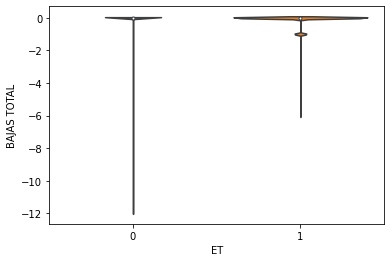

In [46]:
#data_causal['ET','BAJAS TOTAL']
sns.violinplot(data=data_causal, x="ET", y="BAJAS TOTAL")

<AxesSubplot:>

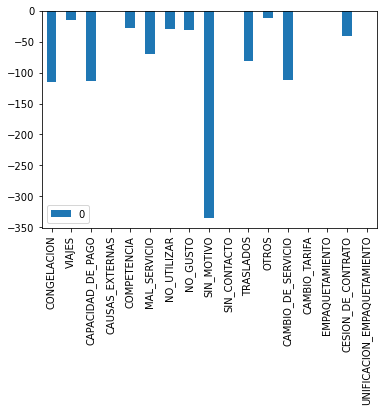

In [47]:
data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame().plot.bar()

<AxesSubplot:>

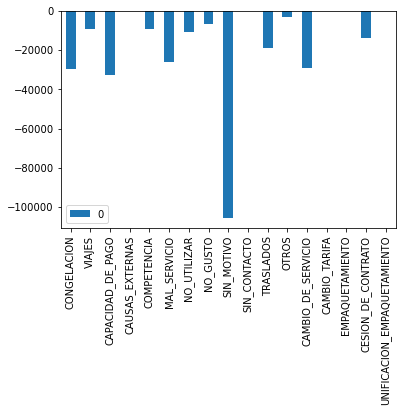

In [48]:
data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame().plot.bar()

In [49]:
resumen_causa=data_causal[seleccionVariables].sum().to_frame()
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==1][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa=resumen_causa.merge(data_causal[data_causal['ET']==0][seleccionVariables].sum().to_frame(), left_index=True,right_index=True, how='left')
resumen_causa.columns=['total','critico','normal']
resumen_causa

,total,critico,normal
CONGELACION,-29982.0,-115.0,-29867.0
VIAJES,-9221.0,-14.0,-9207.0
CAPACIDAD_DE_PAGO,-32739.0,-113.0,-32626.0
CAUSAS_EXTERNAS,0.0,0.0,0.0
COMPETENCIA,-9283.0,-27.0,-9256.0
MAL_SERVICIO,-26348.0,-70.0,-26278.0
NO_UTILIZAR,-11051.0,-30.0,-11021.0
NO_GUSTO,-6831.0,-31.0,-6800.0
SIN_MOTIVO,-105927.0,-335.0,-105592.0
SIN_CONTACTO,-3.0,0.0,-3.0


In [50]:
x = resumen_causa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
resumen_causa_nor = pd.DataFrame(x_scaled)
resumen_causa_nor.index=resumen_causa.index
resumen_causa_nor.columns=resumen_causa.columns
resumen_causa_nor

,total,critico,normal
CONGELACION,0.716956,0.656716,0.717147
VIAJES,0.912949,0.958209,0.912806
CAPACIDAD_DE_PAGO,0.690929,0.662687,0.691018
CAUSAS_EXTERNAS,1.000000,1.000000,1.000000
COMPETENCIA,0.912364,0.919403,0.912342
MAL_SERVICIO,0.751263,0.791045,0.751136
NO_UTILIZAR,0.895673,0.910448,0.895627
NO_GUSTO,0.935512,0.907463,0.935601
SIN_MOTIVO,0.000000,0.000000,0.000000
SIN_CONTACTO,0.999972,1.000000,0.999972


<Figure size 432x288 with 0 Axes>

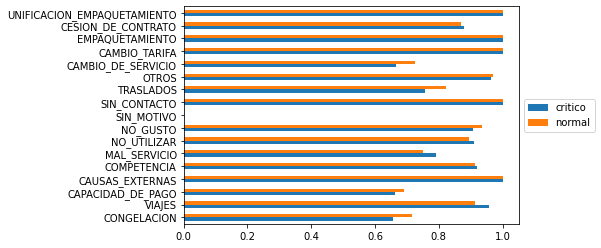

In [52]:
f = plt.figure()
resumen_causa_nor[['critico','normal']].plot.barh();
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [53]:
resumen_causa_nor['dif']=resumen_causa_nor['critico']-resumen_causa_nor['normal']

In [54]:
resumen_causa_nor=resumen_causa_nor.sort_values('dif', ascending=False)
resumen_causa_nor

,total,critico,normal,dif
VIAJES,0.912949,0.958209,0.912806,0.045403
MAL_SERVICIO,0.751263,0.791045,0.751136,0.039908
NO_UTILIZAR,0.895673,0.910448,0.895627,0.014821
CESION_DE_CONTRATO,0.870128,0.880597,0.870094,0.010503
COMPETENCIA,0.912364,0.919403,0.912342,0.007061
UNIFICACION_EMPAQUETAMIENTO,0.999896,1.000000,0.999896,0.000104
SIN_CONTACTO,0.999972,1.000000,0.999972,0.000028
EMPAQUETAMIENTO,1.000000,1.000000,1.000000,0.000000
CAMBIO_TARIFA,1.000000,1.000000,1.000000,0.000000
SIN_MOTIVO,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

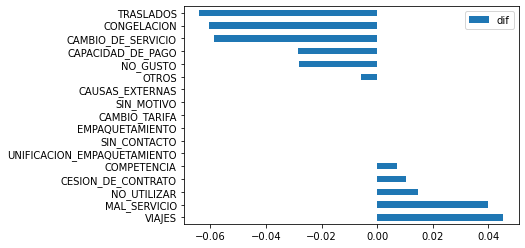

In [55]:
# Diferencia entre críticos y normales
resumen_causa_nor[['dif']].plot.barh()

## ARBOL

In [56]:
def visualizarArbol(model_fit,depth):
    fig, ax = plt.subplots(figsize=(depth*10,10))
    print(f"Profundidad del árbol: {tree_model.get_depth()}")
    print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")
    plot = plot_tree(
                decision_tree = tree_model,
                feature_names = seleccionVariables,
                class_names   = ['normal','critico'],
                filled        = True,
                impurity      = False,
                fontsize      = 10,
                precision     = 3,
                ax            = ax
           )

Profundidad del árbol: 5
Número de nodos terminales: 7


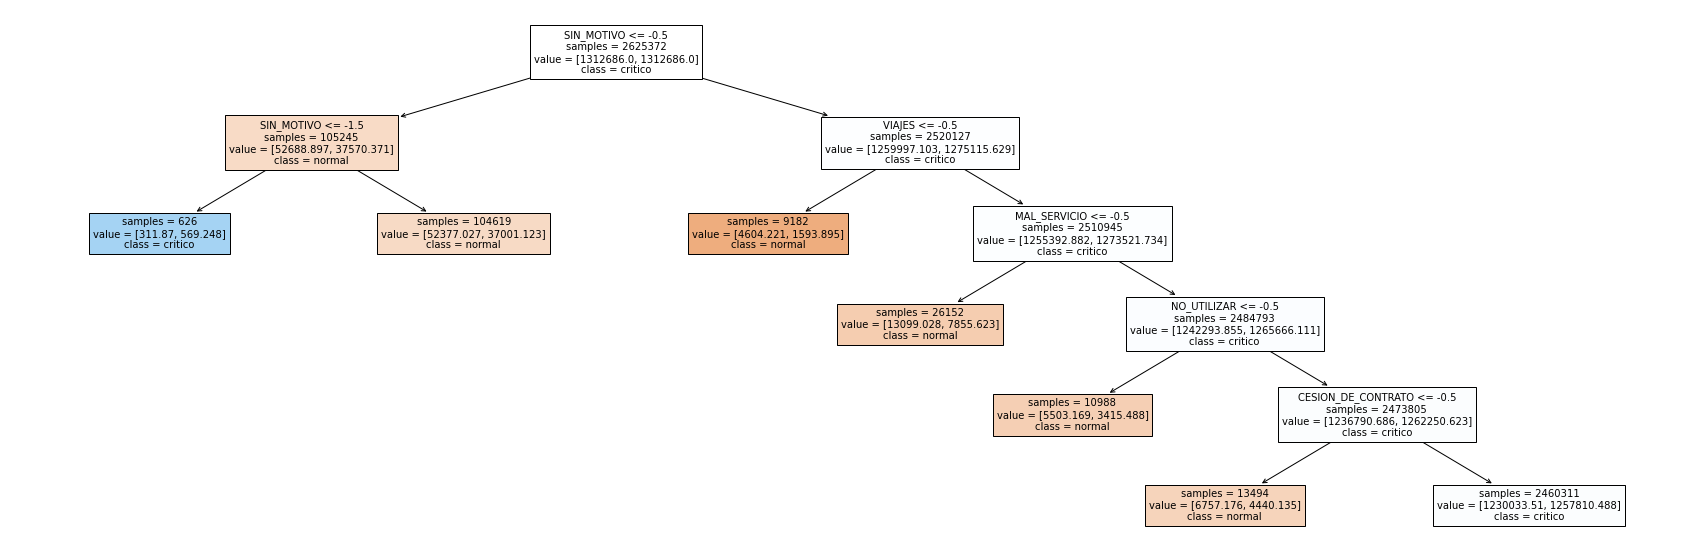

In [57]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,min_samples_leaf=500, class_weight='balanced')
model_fit = tree_model.fit(X = data_causal[seleccionVariables], y = data_causal["ET"])
visualizarArbol(model_fit,3)

### Próximos pasos
* diferenciar entre voluntarios e involuntarios
* quitar variable blanco
* validar cambio tendencia ene-may

### Voluntarios

In [ ]:
data_medida_voluntario=data_medida[data_medida['INVOLUNTARIO']==0]

resumen_medida=pd.pivot_table(data_medida_voluntario[['FECHA_1','COD_NODO','ALFA_tarifa']], columns='FECHA_1', index='COD_NODO',aggfunc=np.mean)
resumen_medida.columns = resumen_medida.columns.droplevel()
resumen_medida

In [ ]:
resumen_medida['ene_oct']=resumen_medida[10]-resumen_medida[1]
resumen_medida['ene_may']=resumen_medida[5]-resumen_medida[1]

In [ ]:
sns.violinplot(data=resumen_medida)

In [ ]:
resumen_medida.isnull().sum()

In [ ]:
resumen_medida.isnull().sum()/len(resumen_medida)

In [ ]:
resumen_medida['bin_alfa']=pd.cut((resumen_medida['ene_oct']),bins=5,right=True)
resumen_medida['bin_alfa'].value_counts().to_frame().sort_index()

In [ ]:
resumen_medida['ene_oct'].quantile(0.05)

##### Segunda Parte

In [ ]:
data_causal_vol=data_causal[data_causal['INVOLUNTARIO']==0]
len(data_causal_vol)

In [ ]:
data_causal_vol.columns

In [ ]:
data_causal_vol['ET']=np.where(data_causal_vol['ene_oct']<=-0.5,1,0)

In [ ]:
data_causal_vol['ET'].value_counts()

In [ ]:
data_causal_vol['ET'].value_counts()/len(data_causal)

In [ ]:
sns.violinplot(data=data_causal_vol, x="ET", y="BAJAS TOTAL")